# Colourmap builder

Convert a standard matplotlib coulour ramp into a coulour ramp that can be used in a Sentinel Hub Evalscript.

In [1]:
from matplotlib import cm, colors, colorbar, colormaps
import matplotlib.pyplot as plt
import numpy as np

## Set input parameters

To build our colour ramp, we will need:

- the name of the matplotlib colormap that we will use
- the number of intervals required
- the starting value of the colour ramp
- the end value of the colour map

In [2]:
# Set a colormap name from matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py
colormap = "YlGn"

# Number of colours
mylen = 10

# Start value
start = 0

# End value
stop = 100

The following cell contains the function to build a colour ramp fit for an Evalscript.

In [3]:
def create_colourramp(cname, length, start, stop):
    """
    Create a custom color map for an Evalscript based on a matplotlib colourmap.

    Args:
        cname (str): Name of the color map.
        length (int): Number of colors in the color map.
        start (float): Starting point of the color range.
        stop (float): Ending point of the color range.

    Returns:
        list: A custom color map object.

    Example:
        >>> cmap = create_colourmap('my_cmap', 100, 0.2, 0.8)
    """

    # Make range
    myrange = list(np.arange(start, stop + stop / mylen, stop / mylen))

    # Get colours for range
    cmap = colormaps.get_cmap(colormap).resampled(len(myrange))

    # Make list for Evalscript
    output_bar = []

    for i in list(zip(myrange, range(cmap.N))):
        rgba = cmap(i[1])
        output_bar.append([i[0], colors.rgb2hex(rgba).replace("#", "0x")])

    return output_bar

Create a colour ramp based on the input parameters specified above.

In [4]:
eval_cm = create_colourramp(colormap, mylen, start, stop)

eval_cm

[[0.0, '0xffffe5'],
 [10.0, '0xf9fdc2'],
 [20.0, '0xe5f5ac'],
 [30.0, '0xc7e89b'],
 [40.0, '0xa2d88a'],
 [50.0, '0x78c679'],
 [60.0, '0x4cb063'],
 [70.0, '0x2f944d'],
 [80.0, '0x15793e'],
 [90.0, '0x006134'],
 [100.0, '0x004529']]

This list can now be integrated in an Evalscript as follows (see https://docs.sentinel-hub.com/api/latest/evalscript/functions/#colorrampvisualizer):

```
const ramp = [[0.0, '0xffffe5'],
 [10.0, '0xf9fdc2'],
 [20.0, '0xe5f5ac'],
 [30.0, '0xc7e89b'],
 [40.0, '0xa2d88a'],
 [50.0, '0x78c679'],
 [60.0, '0x4cb063'],
 [70.0, '0x2f944d'],
 [80.0, '0x15793e'],
 [90.0, '0x006134'],
 [100.0, '0x004529']]

 const visualizer = new ColorRampVisualizer(ramp);

visualizer.process(10); // [ 0.98, 0.99, 0.76 ]
visualizer.process(100); // [ 0, 0.27, 0.16 ]


```

## Plot the colourbar for the coulour ramp created

We can also create a colourbar for our newly created coulour ramp. The cell belows plots an example for the colour ramp created above.

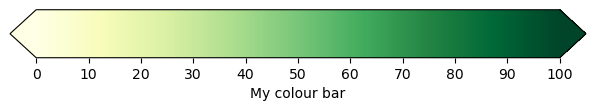

In [5]:
# Make a plot for the colour bar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=colormap,
                               norm=colors.Normalize(start, stop),  # vmax and vmin
                               extend="both",
                               label='My colour bar',
                               ticks=[x[0] for x in eval_cm])